In [152]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from IPython.display import display, Image

In [153]:
import warnings
warnings.filterwarnings("ignore")

In [154]:
WorkingDir = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)"
WorkingDir += "\\2. Labs\\AI Specialist Support 01"

os.chdir(WorkingDir)
checkPath = %pwd
print(checkPath)

D:\TUANTA\VTC Academiy\AI VTCA Teaching Materials\Short-Course AI\4. AI Specialist(AI Engineer)\2. Labs\AI Specialist Support 01


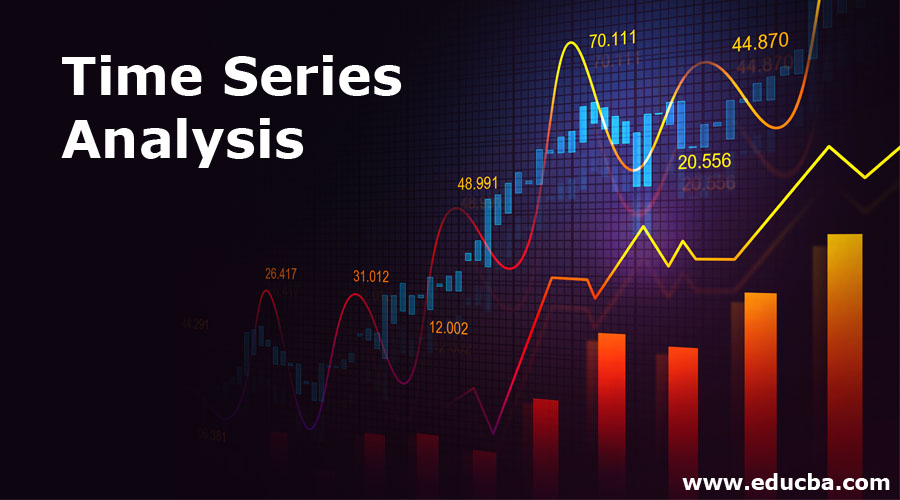

In [4]:
display(Image(filename='Time-Series-Analysis.jpg'))

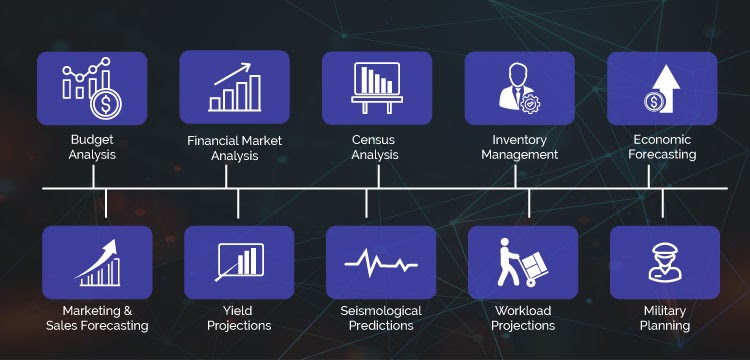

In [5]:
display(Image(filename='Time Series Applications.jpg'))

In [155]:
# Understanding the Problem Statement
# Moving Average
# Linear Regression
# k-Nearest Neighbors
# Auto ARIMA
# Long Short Term Memory (LSTM)

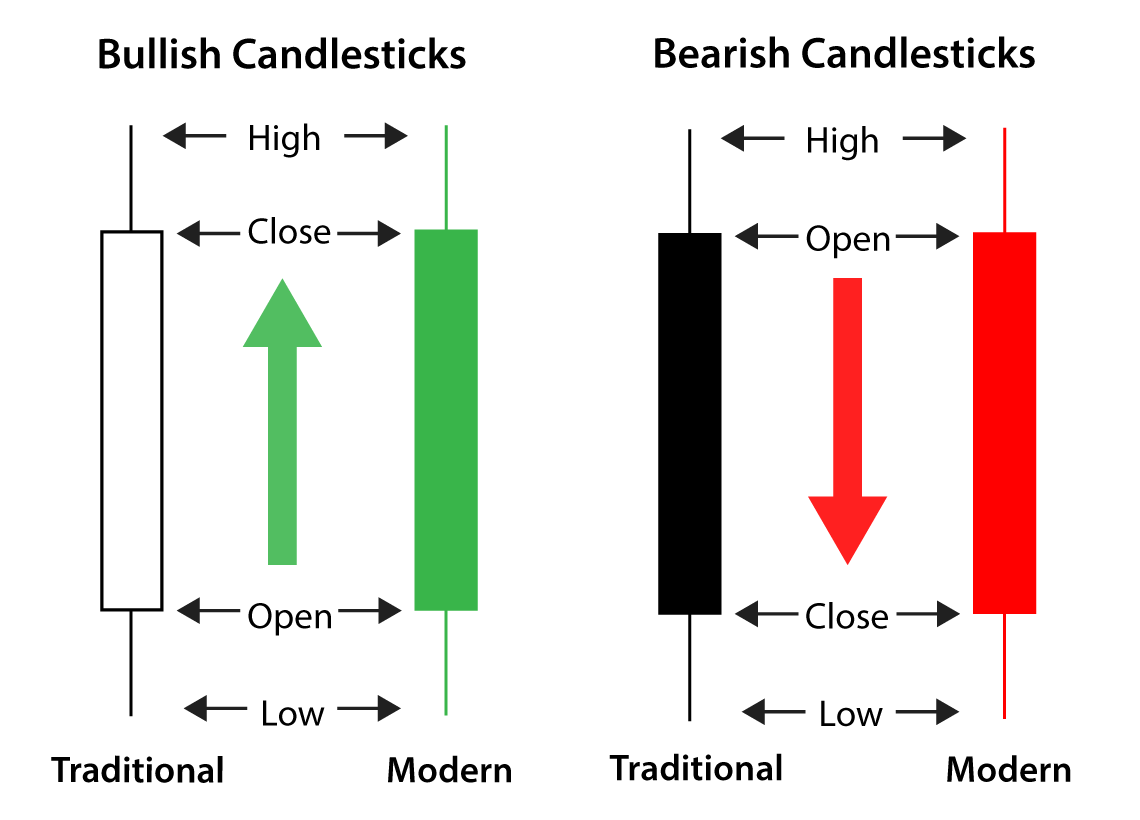

In [156]:
display(Image(filename='Candlesticks.png'))

In [157]:
#read the file
data = pd.read_csv('NSE-TATAGLOBAL11.csv')

#print the head
display(data.head())
print(data.shape)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


(1235, 8)


There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low and Last represent the maximum, minimum, and last price of the share for the day.
Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.
Another important thing to note is that the market is closed on weekends and public holidays. Notice the above table again, some date values are missing – 2/10/2018, 6/10/2018, 7/10/2018. Of these dates, 2nd is a national holiday while 6th and 7th fall on a weekend.

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

In [158]:
#setting index as date
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

#sorting
data = data.sort_index(ascending=True, axis=0)

display(data.head())

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


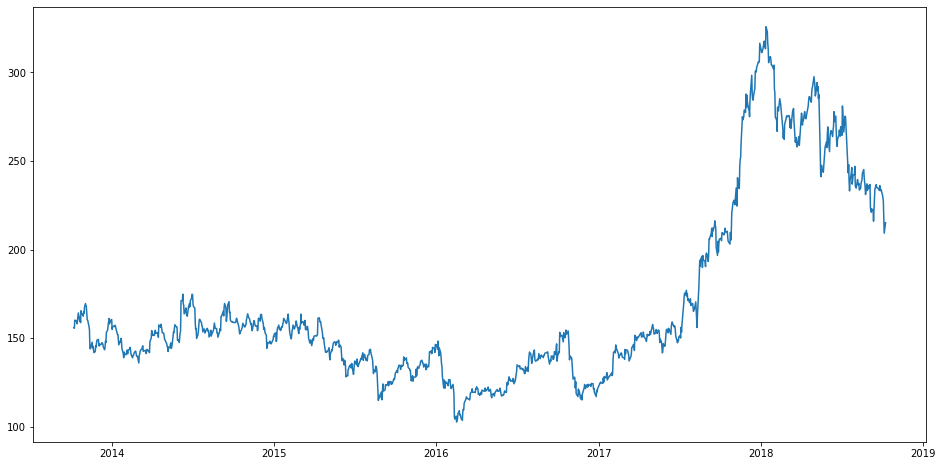

In [159]:
#plot
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
plt.show()

In [160]:
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [161]:
display(new_data.head())

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [243]:
# !pip install fastai

In [162]:
# #create features
from fastai.tabular.all import add_datepart
add_datepart(new_data, 'Date')

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,1.381190e+09
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,1.381277e+09
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,1.381363e+09
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1.381450e+09
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1.381709e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,230.9,2018,10,40,1,0,274,False,True,False,True,False,False,1.538352e+09
1231,227.6,2018,10,40,3,2,276,False,False,False,False,False,False,1.538525e+09
1232,218.2,2018,10,40,4,3,277,False,False,False,False,False,False,1.538611e+09
1233,209.2,2018,10,40,5,4,278,False,False,False,False,False,False,1.538698e+09


In [163]:
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

This creates features such as:

‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’.

In [164]:
display(new_data.head())

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False


In [165]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data.loc[i,'Dayofweek'] == 0 or new_data.loc[i,'Dayofweek'] == 4):
        new_data.loc[i,'mon_fri'] = 1
    else:
        new_data.loc[i,'mon_fri'] = 0

In [166]:
display(new_data.head())

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,0
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,0
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,0
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1


In [143]:
#Moving Average

In [167]:
# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [168]:
new_data.shape, train.shape, valid.shape

((1235, 14), (987, 14), (248, 14))

In [171]:
# make predictions
preds = []
for i in range(0,248):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [172]:
# calculate rmse
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

104.51415465984348

In [173]:
valid = valid.reset_index(drop = True)
valid['Predictions'] = preds

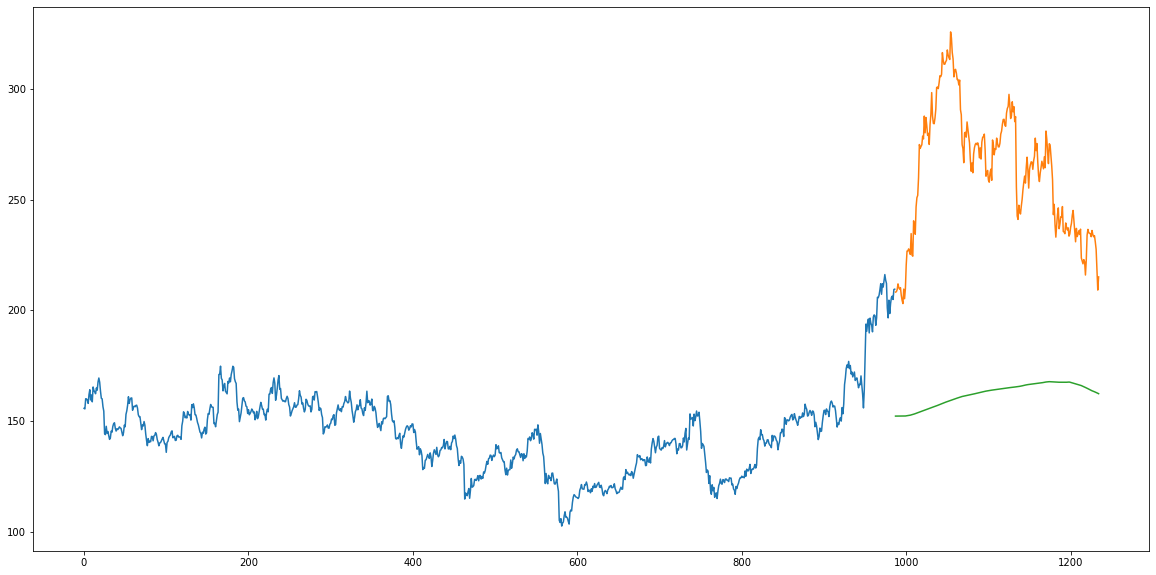

In [174]:
#plot
valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [100]:
# Linear Regression

In [175]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [176]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [177]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

121.16291596523385

In [178]:
valid = valid.reset_index(drop = True)
valid['Predictions'] = preds

In [179]:
valid.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,Predictions
0,208.3,2017,10,41,9,0,282,False,False,False,False,False,False,1,148.450297
1,208.45,2017,10,41,10,1,283,False,False,False,False,False,False,0,148.584467
2,209.4,2017,10,41,11,2,284,False,False,False,False,False,False,0,148.775762
3,212,2017,10,41,12,3,285,False,False,False,False,False,False,0,148.967057
4,210.25,2017,10,41,13,4,286,False,False,False,False,False,False,1,149.215478


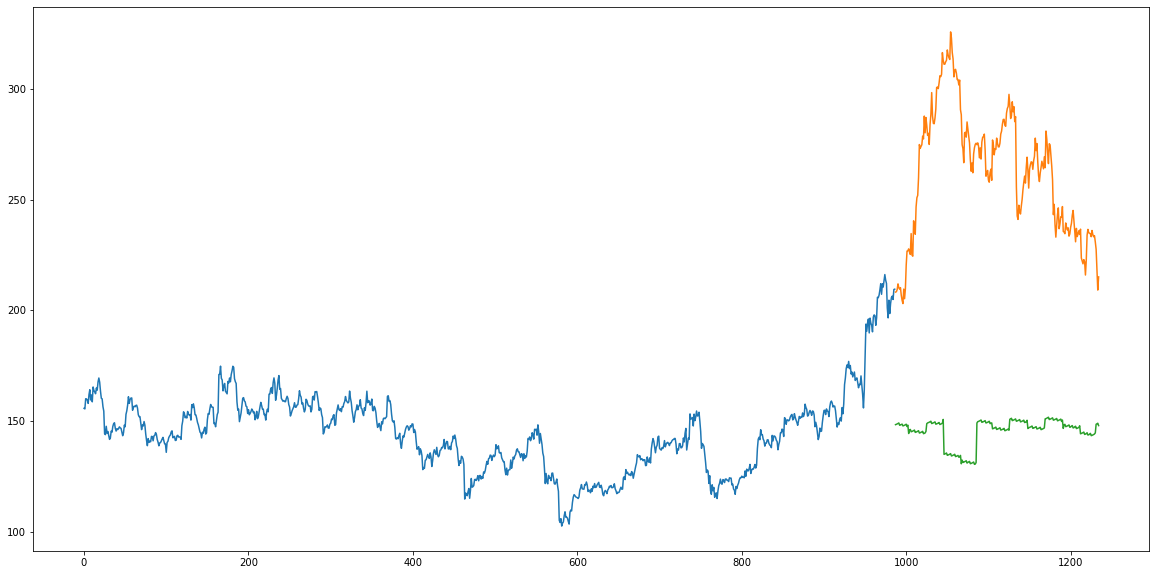

In [180]:
#plot
valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [101]:
# k-Nearest Neighbors

In [102]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [103]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

In [104]:
#scaling data
x_train_scaled = scaler.fit_transform(train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [105]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [106]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

116.83527653289447

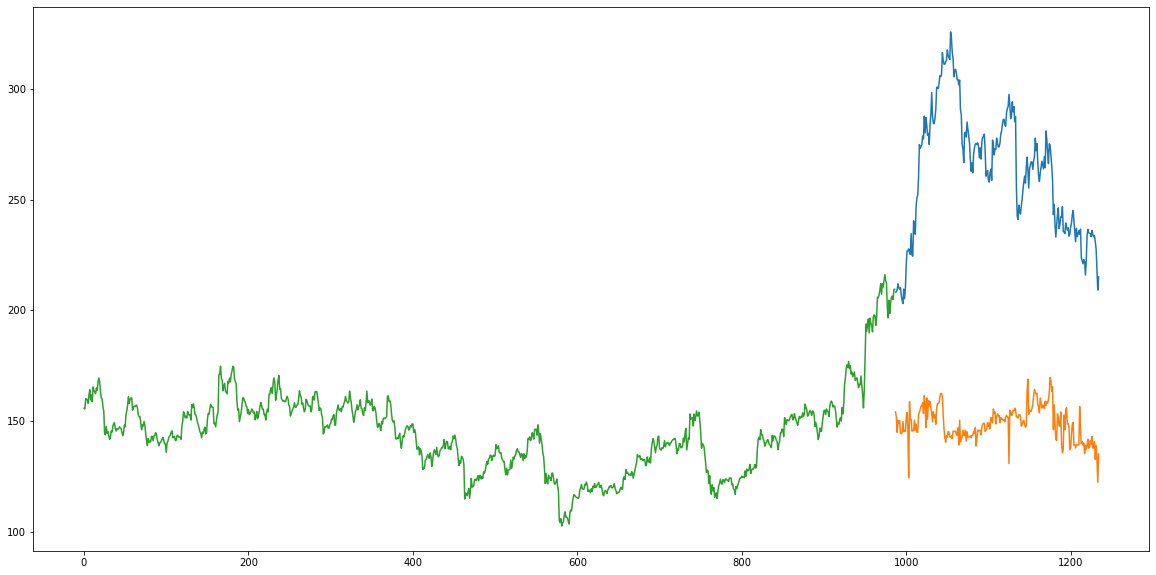

In [107]:
#plot
valid = valid.reset_index(drop = True)
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [ ]:
# Auto ARIMA

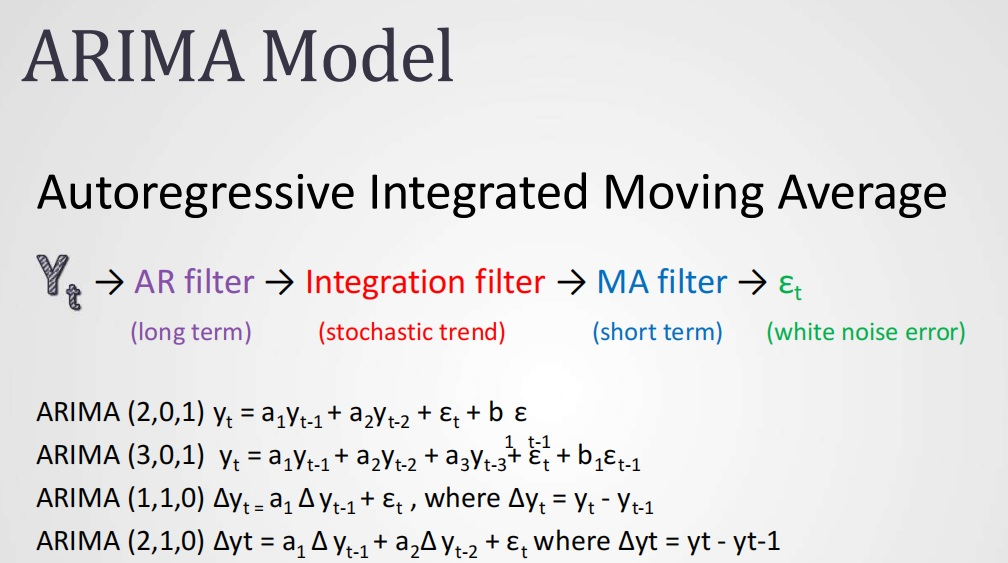

In [139]:
display(Image(filename='ARIMA Model.jpg'))

In [255]:
# !pip install pmdarima

In [108]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6097.127, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5773.037, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6098.343, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5683.554, Time=1.00 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.80 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5681.707, Time=0.78 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5771.244, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=10.75 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5683.552, Time=1.03 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5685.545, Time=3.52 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5683

In [109]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

16.996258170544408

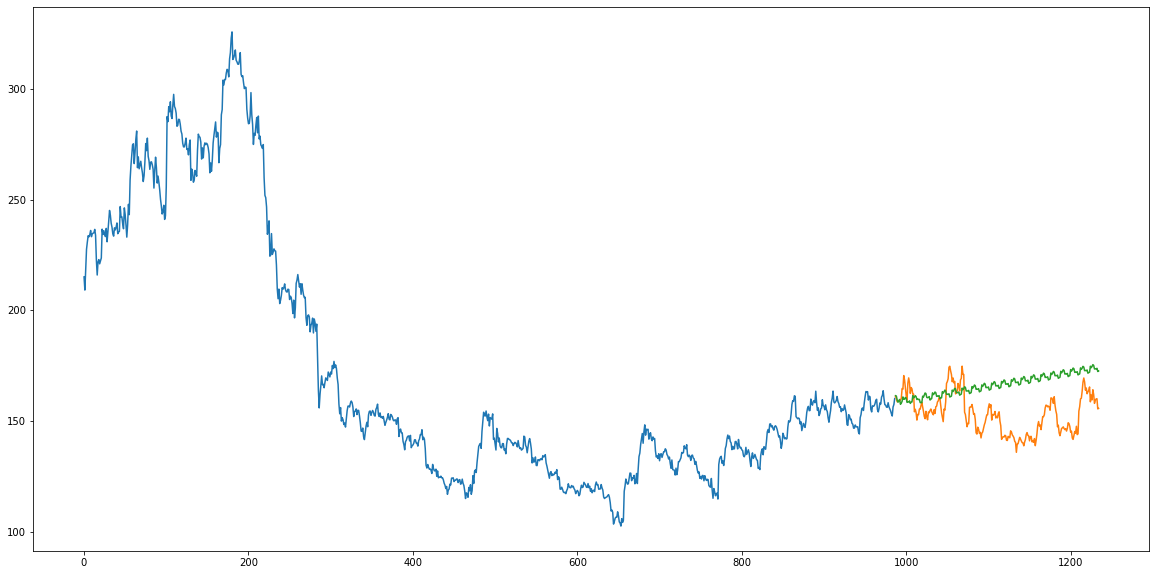

In [110]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [111]:
# Long Short Term Memory (LSTM)

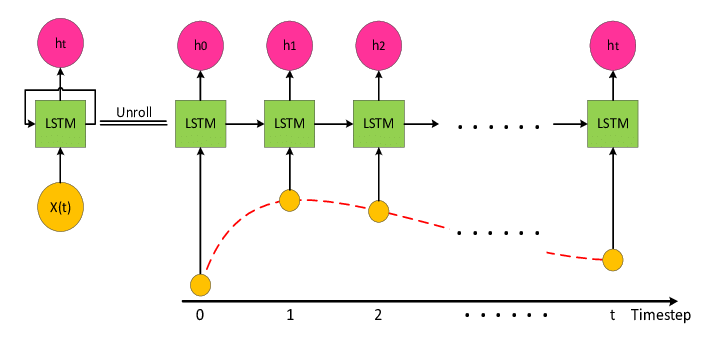

In [141]:
display(Image(filename='LSTM Model.png'))

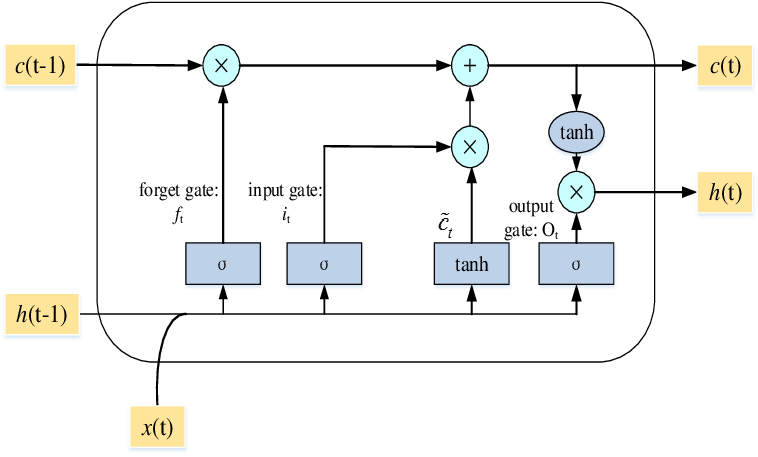

In [142]:
display(Image(filename='LSTM Model 2.png'))

In [122]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [123]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [124]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [125]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [126]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

927/927 - 18s - loss: 0.0035


In [127]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [128]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

6.508201641211724

In [133]:
# new_data = new_data.reset_index(drop=False)

In [134]:
train = new_data[:987]
valid = new_data[987:]

In [135]:
closing_price = closing_price.reshape(-1)

In [136]:
valid = valid.assign(Predictions=closing_price)

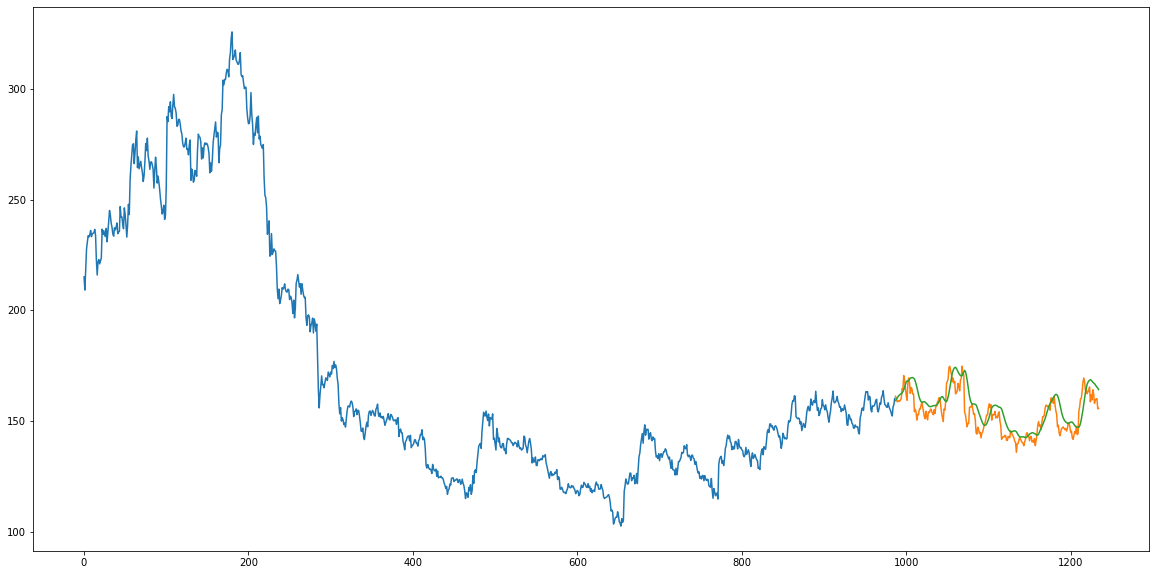

In [137]:
#for plotting
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])